# Problem at Hand

When a reservation is made, it's not always guaranteed that the guest may show up. For example the guest may have cancelled their trip, flight got delayed, illness, or even possibly booked at the wrong location. 

From this, the conflict arises for the hotel. They may have almost no vacancy left, so those rooms guaranteed by the guest's reservations provides a loss of revenue if they decide to not show up.

To help fix this issue, we can design prediction model to determine if a hotel booking would be canceled

# Steps we'll Take

- Importing Libraries

- Exploring the Dataset
  - Summary Statistics
  - Basic data information

- Preprocessing
  - Cleaning
  - Transformation

- EDA
  - Exploring variable relation to response variable
  - Correlation Matrix

- Model Building

- Model Accuracy
  - Compare model performances (accuracy, precision, F1-score, recall)




# Importing Libraries

To install libraries for the first time: 
1) Check version of pip: pip --version 
3) Install using pip: pip install "library-name"

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Exploring Dataset

Metadata:
- is_canceled: Reservation cancellation status (0 = not canceled, 1 = canceled)
- lead_time: Number of days between booking and arrival
- arrival_date_year: Year of arrival
- arrival_date_month: Month of arrival
- arrival_date_week_number: Week number of the year for arrival
- arrival_date_day_of_month: Day of the month of arrival
- stays_in_weekend_nights: Number of weekend nights (Saturday and Sunday) the guest stayed or booked
- stays_in_week_nights: Number of week nights the guest stayed or booked
- adults: Number of adults
- children: Number of children
- babies: Number of babies
- meal: Type of meal booked (BB, FB, HB, SC, Undefined)
- country: Country of origin of the guest
- market_segment: Market segment designation
- distribution_channel: Booking distribution channel
- is_repeated_guest: If the guest is a repeat customer (0 = not repeated, 1 = repeated)
- previous_cancellations: Number of previous bookings that were canceled by the customer
- previous_bookings_not_canceled: Number of previous bookings that were not canceled by the customer
- reserved_room_type: Type of reserved room
- assigned_room_type: Type of assigned room
- booking_changes: Number of changes made to the booking
- deposit_type: Type of deposit made (No Deposit, Refundable, Non Refund)
- agent: ID of the travel agent responsible for the booking
- company: ID of the company responsible for the booking
- days_in_waiting_list: Number of days the booking was in the waiting list
- customer_type: Type of customer (Transient, Contract, Transient-Party, Group)
- adr: Average Daily Rate
- required_car_parking_spaces: Number of car parking spaces required
- total_of_special_requests: Number of special requests made
- reservation_status: Last reservation status (Check-Out, Canceled, No-Show)
- reservation_status_date: Date of the last reservation status
- name: Guest's name
- email: Guest's email address
- phone-number: Guest's phone number
- credit_card: Last four digits of the guest's credit card


In [108]:
hotel_df = pd.read_csv('/Users/kesarsidhu/VS Code/AISC/BP - Winter 2025/hotel_booking.csv')

hotel_df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [109]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### General Info

- Dataset contains 119,390 entries with 36 variables

- Data types
  - float64 (4): decimal valued-columns
  - int64 (16): integer valued-columns
  - object (16): categorical/string data

- Missing Values:
  - Children (4)
  - Country (488)
  - Agent (16,340)
  - Company (112,593)

In [110]:
# Since majority of our columns are objects, we will be working with them a lot
# To ensure they're in the right object format (string), and don't consist of mix data types

categorical_columns = [
    'hotel',
    'is_canceled',
    'arrival_date_year',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'is_repeated_guest',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'agent',
    'company',
    'customer_type',
    'reservation_status',
    'name',
    'email',
    'phone-number',
    'credit_card'
]

# Convert all columns to string
for column in categorical_columns:
    hotel_df[column] = hotel_df[column].astype(str)

# Check if the columns have been converted to string 
hotel_df.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [111]:
# Summary statistics for numerical columns

hotel_df.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,106.863097,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


### Insights:

- Lead_time: From 0-737 days, average time between booking and arrival is around 104 days (reservations are made 3-4 months in advance)

- Arrival_date_week_number: From 1-53 weeks, average arrival week is around week 27 (mid-year).

- Arrival_date_day_of_month: From 1-31 days, average arrival day is around the 16th of the month.

- Stays_in_weekend_nights: From 0-19 nights, guests stay around 1 weekend night on average.

- Stays_in_week_nights: From 0-50 nights, guests stay around 2-3 weeknights on average.

- Adults: From 0-55 adults, most bookings have about 2 adults on average.

- Children: From 0-10 children, most bookings have about 0-1 child on average.

- Babies: From 0-10 babies, the average number of babies per booking is almost 0.

- Previous_cancellations: From 0-26, guests canceled about 0.1 times on average.

- Previous_bookings_not_canceled: From 0-72, guests have about 0.1 past bookings they didn’t cancel on average.

- Booking_changes: From 0-21, bookings are changed about 0.2 times on average.

- Days_in_waiting_list: From 0-391 days, bookings spend around 2 days on the waiting list on average.

- Adr (Average Daily Rate): From -6.38 to 5400, the average daily rate is about 102 (negative values may indicate errors or special cases).

- Required_car_parking_spaces: From 0-8, guests require about 0.06 parking spaces on average.

- Total_of_special_requests: From 0-5, guests make about 0.6 special requests on average.

---------------------------------------------------------

### General Inferences:

- Guests who book far in advance (average 104 days) may have a higher chance of canceling, as plans made months ahead are more likely to change.

- Guests with multiple previous cancellations may have a higher probability of canceling future bookings.

- Bookings with frequent changes or multiple special requests may indicate indecisive behavior, which could be linked to cancellation risk.

- Longer time spent on waiting list could lead to greater lost interest by guest


---------------------------------------------------------

### Noticeable Errors:
- ADR represents avg. amount guest pays for a room per day. Minimum values of -6.38 isn't logical

- Some values for adults are 0, indicating bookings without any adults. Possible error unless children book the room themselves

- Children and babies have a max value of 10. For a single booking it seems fairly high. Possible error, unless size of room is huge (more context needed)

In [112]:
# Summary statistics for categorical columns

hotel_df.describe(include = "object") 

,hotel,is_canceled,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,...,deposit_type,agent,company,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,...,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,2,3,12,5,178,8,5,2,10,...,3,334,353,4,3,926,81503,115889,119390,9000
top,City Hotel,0,2016,August,BB,PRT,Online TA,TA/TO,0,A,...,No Deposit,9.0,nan,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,75166,56707,13877,92310,48590,56477,97870,115580,85994,...,104641,31961,112593,89613,75166,1461,48,6,1,28


### Insights:

- Hotel: There are two hotel types. "City Hotel" is the most common, with 79,330 bookings out of 119,390 total entries.

- Is Canceled: Guests either canceled (1) or did not cancel (0). Most bookings (75,166) were not canceled.

- Arrival Date Year: Bookings span three years, with 2016 being the most common (56,707 bookings).

- Arrival Date Month: Guests arrived in all 12 months. August is the busiest, with 13,877 arrivals.

- Meal: Five meal types are available. "BB" (Bed and Breakfast) is the most popular, booked 92,310 times.

- Country: Guests come from 178 countries. Most are from Portugal ("PRT"), with 48,590 entries.

- Market Segment: There are eight market segments. "Online TA" (Online Travel Agents) is the most common, with 56,477 bookings.

- Distribution Channel: Bookings are made through five channels. "TA/TO" (Travel Agent/Tour Operator) is the most popular, used 97,870 times.

- Is Repeated Guest: Most guests are not repeated visitors (0), making up the majority of bookings.

- Room Types: Guests reserve and are assigned various room types, with some room categories being more common.

- Deposit Type: Three deposit types exist. "No Deposit" is the most frequent, with 104,641 bookings.

- Agent: There are 334 booking agents. The most common is agent '9.0', used 31,961 times.

- Company: Among 353 companies, most entries are missing ("NaN"), appearing in 112,593 bookings.

- Customer Type: Guests fall into four categories. Most are "Transient" customers (89,613 bookings).

- Reservation Status: Three statuses exist. "Check-Out" is the most frequent, recorded 75,166 times.

- Reservation Status Date: There are 926 unique status dates. The most frequent is "2015-10-21," with 1,461 occurrences.

- Name: There are 81,503 unique guest names. "Michael Johnson" appears the most, 48 times.

- Email: Most email addresses are unique, with 115,889 distinct entries. "Michael.C@gmail.com" is the most frequent, appearing six times.

- Phone Number: Almost all guests have unique phone numbers, with 119,390 different entries.

- Credit Card: Among 9,000 unique credit cards, "**4923" appears the most, 28 times.

---------------------------------------------------------

### General Inferences:

- Since most bookings are not canceled (is_canceled = 0), it suggests that guests tend to honor their reservations

- City Hotels are preferred, indicating that guests favor staying in cities for their trips.

- Many missing company values show that most guests aren’t booking through companies.

# Preprocessing

Aim towards cleaning and transforming raw data into a format for machine learning algorithms to comprehend

### 1) Feature Selection

By removing unnecessary features early, you can save time and effort in later steps like cleaning, encoding, scaling 

Few Things to Keep in Mind During this Process:

1) Avoid Related Features: variable is highly correlated with the target, causing model to cheat. Uses information that wouldn't be available when making predictions

2) Irrelevant Features: get rid of features that don't contribute meaningful information, some variables have no correlation

3) High Cardinality Features: some categorical variables have too many unique values, which could cause over-fitting. Extract useful information and then drop them.


#### Dropping Related Features:

1) Reservation_status: literally states the outcome of the reservation. If model has access to this column, it'll just memorize the outcome

2) Reservation_status_date: contains information of when the data of cancellation was. Since we're forecasting future cancellation, we wouldn't have this information yet

3) Assigned_room_type: could give the model hints about whether the booking was canceled, but only because the room assignment is a step that follows the booking. If the booking is canceled, the room might not be assigned at all.



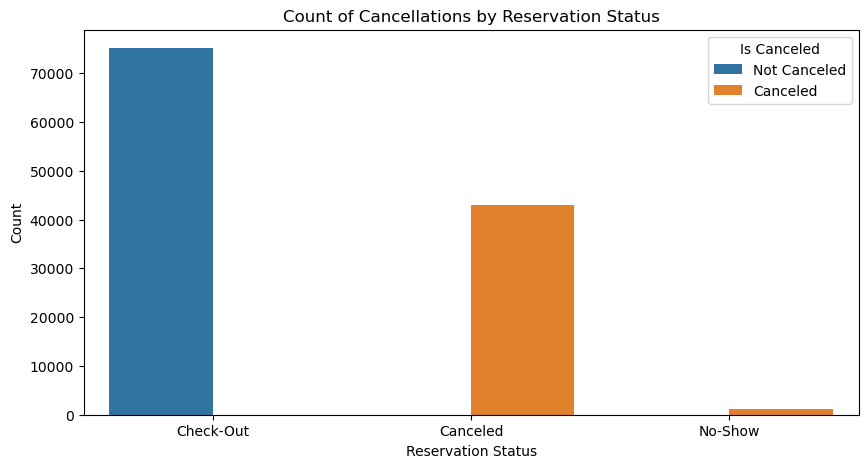

In [113]:
# Dropping reservation_status: 

plt.figure(figsize=(10, 5))
sns.countplot(x='reservation_status', hue='is_canceled', data= hotel_df)
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

hotel_df = hotel_df.drop(['reservation_status'], axis=1)



The plot shows that all bookings with a "Canceled" or "No-Show" status are actually canceled (is_canceled = 1), and all bookings with a "Check-Out" status are not canceled (is_canceled = 0).

This means the reservation_status feature is directly tied to the is_canceled variable, and using it in the model would leak information.

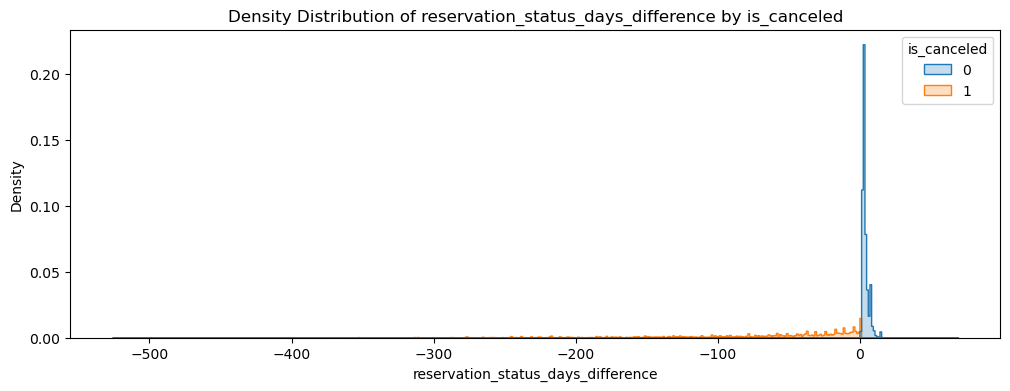

In [114]:
# Dropping reservation_status_date:

# Converting to datetime formate for easier to work with dates easier
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'])

# Creating a new column to calculate the difference between the reservation_status_date and the arrival date
hotel_df['reservation_status_days_difference'] = (hotel_df['reservation_status_date'] - pd.to_datetime(hotel_df['arrival_date_year'].astype(str) + '-' + hotel_df['arrival_date_month'] + '-' + hotel_df['arrival_date_day_of_month'].astype(str))).dt.days

hotel_df[['reservation_status_days_difference']].head()

# Plotting the distribution of reservation_status_days_difference by is_canceled
plt.figure(figsize=(12, 4))
sns.histplot(data=hotel_df, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density")
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

hotel_df = hotel_df.drop(['reservation_status_date', 'reservation_status_days_difference'], axis=1)




Positive values mean the status was updated after the arrival date, and since is_canceled = 0 (not canceled), this suggests that the booking was not canceled.

Negative values mean the status was updated before the arrival date, and since is_canceled = 1 (canceled), this suggests that the booking was canceled.

The model can just rely on this feature to know if the booking was canceled or not, because the timing of the status update is almost always a clue about cancellations.

This gives the model future information that would not be available at prediction time.

In [115]:
# Dropping assigned_room_type:

hotel_df = hotel_df.drop(['assigned_room_type'], axis=1)


#### Dropping Irrelevant Features

Arrival_date_year: only includes a few distinct years, so there’s not much information for the model to learn from. The model might make predictions that are too specific to the years present in the training data, rather than generalizing well to future bookings. Year of arrival may be too specific and cause model to focus on wrong things.


In [116]:
hotel_df['arrival_date_year'].value_counts()

2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [117]:
hotel_df = hotel_df.drop(['arrival_date_year'], axis=1)

#### Dropping High Cardinality Features

As mentioned before, some of our categorical variables have large number of categories (high cardinality), and could not be necessary/cause model complexity. From this, we can check if we can extract useful information from these variables before dropping them

In [118]:
# Creating list of features possibly containing high cardinality
high_cardinality_features = ['country', 'agent', 'company', 'name', 'email', 'phone-number', 'credit_card']

# Checking the number of unique values in each of the high cardinality features
unique_categories = hotel_df[high_cardinality_features].nunique()

# Checking the total number of missing values in each of the high cardinality features
missing_values = hotel_df[high_cardinality_features].isnull().sum()

# Combining into dataframe for easier visualization
high_cardinality_df = pd.DataFrame({'Unique Categories': unique_categories, 'Missing Values': missing_values})

high_cardinality_df






,Unique Categories,Missing Values
country,178,0
agent,334,0
company,353,0
name,81503,0
email,115889,0
phone-number,119390,0
credit_card,9000,0


Observations:

- Country: This feature has many categories, so we'll remove it. If needed, we could group countries by region or keep the top N most frequent countries.

- Agent: Has several unique categories, it could cause over-fitting. We’ll remove it, as the number of bookings per agent isn’t directly tied to cancellations

- Company: We'll omit this feature as it's not informative for cancellations

- Name: This feature has many unique categories, so we'll remove it. We could consider creating a feature for the number of bookings per guest, but it's not directly related to cancellations.

- Email: Similar to the name feature, we could create a feature for the number of bookings per guest but will omit this feature.

- Phone-number: An identifier with no meaningful information, we'll remove it.

- Credit_card: We'll remove it as it has many unique values and is not related to cancellations

In [119]:
hotel_df['number_of_bookings'] = hotel_df.groupby('name')["name"].transform('count') # Grouping the rows of the dataframe based on values in name column

hotel_df = hotel_df.drop(['name', 'country', 'agent', 'company', 'email', 'phone-number', 'credit_card'], axis=1)

hotel_df[['number_of_bookings']].head()



,number_of_bookings
0,1
1,2
2,3
3,1
4,1


## 2) Removing Missing Values


In [120]:
missing_values_percentage = (hotel_df.isnull().sum() / len(hotel_df)) * 100
missing_values_percentage

# With columns of small percentage of missing values, we can replace them with mean, median, or mode of the column

hotel                             0.00000
is_canceled                       0.00000
lead_time                         0.00000
arrival_date_month                0.00000
arrival_date_week_number          0.00000
arrival_date_day_of_month         0.00000
stays_in_weekend_nights           0.00000
stays_in_week_nights              0.00000
adults                            0.00000
children                          0.00335
babies                            0.00000
meal                              0.00000
market_segment                    0.00000
distribution_channel              0.00000
is_repeated_guest                 0.00000
previous_cancellations            0.00000
previous_bookings_not_canceled    0.00000
reserved_room_type                0.00000
booking_changes                   0.00000
deposit_type                      0.00000
days_in_waiting_list              0.00000
customer_type                     0.00000
adr                               0.00000
required_car_parking_spaces       

In [121]:
hotel_df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

Here we see that for the children variable's majority values are 0.
Given this strong value of 0 children, we can replace the missing value with 0 (the mode).

In [122]:
hotel_df["children"] = hotel_df["children"].fillna(0)
hotel_df["children"].isnull().sum()

0

# 3) Handling Noisy Data

The idea of handling noisy data is to address inconsistencies or extreme values

In [123]:
noisy_data = {
    "adr" : hotel_df[hotel_df["adr"] < 0],
    "adults" : hotel_df[hotel_df["adults"] == 0],
    "children" : hotel_df[hotel_df["children"] == 10],
    "babies" : hotel_df[hotel_df["babies"] == 10]
    
}

noisy_data_count = {key: len(value) for key,value in noisy_data.items()}
print(noisy_data_count)

{'adr': 1, 'adults': 403, 'children': 1, 'babies': 1}


Observations:

- Adr: There exists 1 booking with a negative Average Daily Rate. Indicates a potential error. It would be reasonable to replace it with the median as it won't affect the distribution of the data

- Adults: 403 bookings with 0 adults exist, indicating possible errors unless rooms were provided to those booked by children or babies *(highly unlikely)*. Since this is a small proportion of the dataset, we could remove these rows

- Children: 1 booking with 10 children exists, an extreme value for a single booking. This would be considered an outlier and removed from the dataset

- Babies: Likewise, contains 1 booking with 10 babies, another extreme value for a booking. Remove this outlier to address issue



In [124]:
hotel_df.loc[hotel_df["adr"] < 0, "adr"] = hotel_df["adr"].median()

hotel_df = hotel_df[hotel_df["adults"] != 0]

hotel_df = hotel_df[hotel_df["children"] != 10]
hotel_df = hotel_df[hotel_df["babies"] != 10]

# Resetting the index after dropping rows
hotel_df.reset_index(drop=True, inplace=True) 

# Checking if noisy data is fixed
fixed_noisy_data = {
    "adr" : hotel_df[hotel_df["adr"] < 0],
    "adults" : hotel_df[hotel_df["adults"] == 0],
    "children" : hotel_df[hotel_df["children"] == 10],
    "babies" : hotel_df[hotel_df["babies"] == 10]
}

fixed_noisy_data = {key: len(value) for key,value in fixed_noisy_data.items()}
print(fixed_noisy_data)

{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}


# Saving Cleaned Dataset

Later on for the front-end we will need to apply hotel dataset, however if we pass in the raw dataset then the user will be able to type in values that aren't accurate *(our cleaning process won't be applied, so negative values, and outlier numbers will be applied)*

In [125]:
hotel_df.to_csv('cleaned_hotel_data.csv', index=False)

# Encoding Categorical Variables

Types of Encoding:

- One Hot Encoding
  - Required for nominal variables (categorical variables with no specific order). Convert each unique valued used into a separate column.

- Label Encoding
  - Used for ordinal variables (categorical variables with a meaningful order). Assigns a unique integer to each category  in the feature                                                                   

No Encoding Needed:

- is_canceled: This is the target variable and is binary.
- lead_time: This is a numerical variable.
- arrival_date_week_number: This is a numerical variable.
- arrival_date_day_of_month: This is a numerical variable.
- stays_in_weekend_nights: This is a numerical variable.
- stays_in_week_nights: This is a numerical variable.
- adults: This is a numerical variable.
- children: This is a numerical variable.
- babies: This is a numerical variable.
- is_repeated_guest: This is a binary variable.
- previous_cancellations: This is a numerical variable.
- previous_bookings_not_canceled: This is a numerical variable.
- booking_changes: This is a numerical variable.
- days_in_waiting_list: This is a numerical variable.
- adr: This is a numerical variable.
- required_car_parking_spaces: This is a numerical variable.
- total_of_special_requests: This is a numerical variable.
- number_of_bookings: This is a numerical variable.


Label Encoding: *(potentially could avoid One Hot Encoding if the nominal variables have high cardinality. This could cause an avoid a slow and inefficient model, since one hot encoding causes values in a categorical variable to be split into separate columns)*

- hotel: This is a nominal variable with two categories.
- meal: This is a nominal variable.
- market_segment: This is a nominal variable.
- distribution_channel: This is a nominal variable.
- reserved_room_type: This is a nominal variable.
- deposit_type: This is a nominal variable.
- customer_type: This is a nominal variable.
- arrival_date_month: This is an ordinal variable (months have a natural order).


In [126]:
high_cardinality_features_2 = ['hotel', 'meal', 'market_segment', 'distribution_channel', "reserved_room_type", "deposit_type", "customer_type"]

# Checking the number of unique values in each of the high cardinality features
unique_categories_2 = hotel_df[high_cardinality_features_2].nunique()

unique_categories_2






hotel                   2
meal                    5
market_segment          8
distribution_channel    5
reserved_room_type      9
deposit_type            3
customer_type           4
dtype: int64

In [127]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
encoding_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                    'reserved_room_type', 'deposit_type', 'customer_type']

for col in encoding_cols:
    hotel_df[col] = label_encoder.fit_transform(hotel_df[col])

# For arrival_date_month, since it's an ordinal variable, you already mapped it earlier
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

hotel_df['arrival_date_month'] = hotel_df['arrival_date_month'].map(lambda x: months.index(x) + 1)

# Check the DataFrame to make sure encoding is applied
hotel_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  int64  
 1   is_canceled                     118985 non-null  object 
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_month              118985 non-null  int64  
 4   arrival_date_week_number        118985 non-null  int64  
 5   arrival_date_day_of_month       118985 non-null  int64  
 6   stays_in_weekend_nights         118985 non-null  int64  
 7   stays_in_week_nights            118985 non-null  int64  
 8   adults                          118985 non-null  int64  
 9   children                        118985 non-null  float64
 10  babies                          118985 non-null  int64  
 11  meal                            118985 non-null  int64  
 12  market_segment  

In [128]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,number_of_bookings
0,1,0,342,7,27,1,0,0,2,0.0,...,0,2,3,0,0,2,0.0,0,0,1
1,1,0,737,7,27,1,0,0,2,0.0,...,0,2,4,0,0,2,0.0,0,0,2
2,1,0,7,7,27,1,0,1,1,0.0,...,0,0,0,0,0,2,75.0,0,0,3
3,1,0,13,7,27,1,0,1,1,0.0,...,0,0,0,0,0,2,75.0,0,0,1
4,1,0,14,7,27,1,0,2,2,0.0,...,0,0,0,0,0,2,98.0,0,1,1


# Checking Imbalanced Data

Check if target variable "is_canceled" is imbalanced

0    62.924738
1    37.075262
Name: is_canceled, dtype: float64


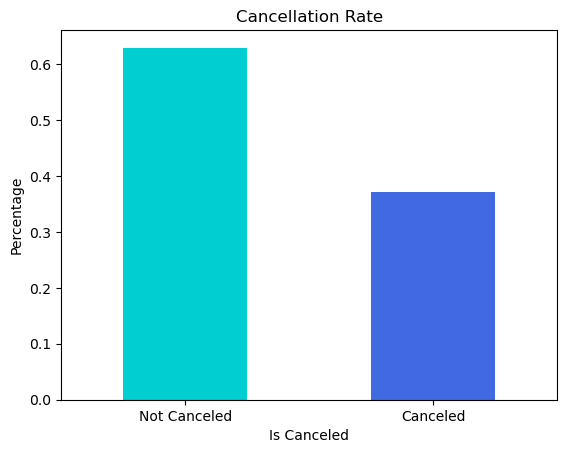

In [129]:
print(hotel_df['is_canceled'].value_counts(normalize=True) * 100) # Checking the percentage of each class in the target variable


hotel_df['is_canceled'].value_counts(normalize=True).plot(kind='bar', color=['darkturquoise', 'royalblue'])
plt.title('Cancellation Rate')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'], rotation=0)
plt.show()

The bar plot shows that 37.08% of bookings were canceled, while 62.92% were not. This means the data is somewhat imbalanced but not extreme. Usually, a dataset is highly imbalanced when one class makes up 80-90% of the data. Since cancellations are still well-represented, resampling (like oversampling or undersampling) may not be needed

In [130]:
hotel_df.dtypes

hotel                               int64
is_canceled                        object
lead_time                           int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
booking_changes                     int64
deposit_type                        int64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
required_car_parking_spaces       

In [131]:
# Invalid Column Type: Is Repeated Guest
hotel_df['is_repeated_guest'] = hotel_df['is_repeated_guest'].astype(int)


In [132]:
hotel_df.dtypes

hotel                               int64
is_canceled                        object
lead_time                           int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
booking_changes                     int64
deposit_type                        int64
days_in_waiting_list                int64
customer_type                       int64
adr                               float64
required_car_parking_spaces       

# Splitting the Dataset

In [133]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

x = hotel_df.drop('is_canceled', axis=1)
y = hotel_df['is_canceled']



# Stratified sampling to ensure that the proportion of target variable in the train and test sets are the same
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

y_train = y_train.astype(int) # Prevents Scikit-Learn from storing 0s and 1s as string values, which can cause issues with some functions
y_test = y_test.astype(int)

# Model Building

Target Variable: "is_canceled" indicates whether a booking was canceled (1) or not (0)

- False negatives (predicting a booking won't be canceled when it actually is). This costly because the hotel may overbook, etc. Goal: maximize recall score for the canceled class (1)

- False positive (predicting a cancellation but the guest actually arrives), may cause unhappy guests. Goal: maximize precision score

F1-score is a metric that balances the false positives (precision) and false negatives (recall)


### Decision Tree

In [28]:
dt_base = DecisionTreeClassifier(random_state = 0)

So to determine the best model, we need the best combination of hyperparameters

- Parameters are values that the model learns on its own from the data during training

- Hyperparameters are settings you can choose before training, which can affect how the model learns



In [134]:
# Create a function that finds the best hyperparameters for the model using GridSearchCV

def find_best_hyperparameters(classifier_type, dict_hyper, x_train, y_train, scoring_metric="f1", cv_split=5):
    
    # Create a cross-validation object using StratifiedKFold
    obj_cv = StratifiedKFold(n_splits=cv_split, shuffle=True, random_state=0)
    
    # Create a GridSearchCV object
    
    grid_search = GridSearchCV(classifier_type, dict_hyper, scoring=scoring_metric, cv=obj_cv, n_jobs = -1)
    
    grid_search.fit(x_train, y_train)
    
    return grid_search.best_estimator_, grid_search.best_params_
    
   

In [135]:
dt_hyperparameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [5, 15, 25],
    "min_samples_split" : [2, 10, 20],
    "min_samples_leaf" : [2, 10, 20],
    "class_weight" : [{0: 1, 1:w} for w in [1,2,3]]
    
}

dt_best_model, dt_best_params = find_best_hyperparameters(dt_base, dt_hyperparameters, X_train, y_train)

print("Best Hyperparameters for Decision Tree: ", dt_best_params)

Best Hyperparameters for Decision Tree:  {'class_weight': {0: 1, 1: 1}, 'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 20}


### Evaluating DT Model



In [136]:
# This function provides a summary of the metrics for the model
def calculating_metrics(classifier_type, X_test, y_test, name_of_model):
    
    y_pred = classifier_type.predict(X_test)
    
    results_df = pd.DataFrame(data = [accuracy_score(y_test, y_pred), # Computes the percentage of correct predictions
                                      
                                      recall_score(y_test, y_pred), # Computes the proportion of actual positive cases that were correctly identified
                                      
                                      precision_score(y_test, y_pred), # Computes the proportion of predicted cancellations that were actually cancelled
                                      f1_score(y_test, y_pred), 
                                      roc_auc_score(y_test, y_pred)],
                                    
                                      index = ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'ROC AUC Score'],
                                      columns = [name_of_model])
    
    formatted_results_df = (results_df * 100).round(2)
    
    return formatted_results_df
                              

In [137]:
# This function provides a complete report of the Classification Metrics (both training and testing) for the model, confusion matrix, and ROC curve

def evaluating_model(classifier_type, X_train, X_test, y_train, y_test):
    

    print("\nClassification Report - Training Set")
    print(classification_report(y_train, classifier_type.predict(X_train)))

    print("\nClassification Report - Test Set")
    print(classification_report(y_test, classifier_type.predict(X_test)))

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=100)

    # Confusion Matrix for test set
    ConfusionMatrixDisplay.from_estimator(classifier_type, X_test, y_test, cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix - Test Set')

    # ROC Curve for test set
    RocCurveDisplay.from_estimator(classifier_type, X_test, y_test, ax=ax2)
    ax2.set_title('ROC Curve - Test Set')

    plt.tight_layout()
    plt.show()
    
    
# Use RocCurveDisplay when you want to visualize model performance across different thresholds.
# Use roc_auc_score(y_test, y_pred) when you want a single AUC value based on a fixed decision threshold.
   


In [138]:
dt_results = calculating_metrics(dt_best_model, X_test, y_test, "Decision Tree")

dt_results

,Decision Tree
Accuracy,82.30
Recall,71.81
Precision,78.59
F1 Score,75.05
ROC AUC Score,80.14



Classification Report - Training Set
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     59897
           1       0.89      0.82      0.85     35291

    accuracy                           0.90     95188
   macro avg       0.90      0.88      0.89     95188
weighted avg       0.90      0.90      0.89     95188


Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     14974
           1       0.79      0.72      0.75      8823

    accuracy                           0.82     23797
   macro avg       0.81      0.80      0.81     23797
weighted avg       0.82      0.82      0.82     23797



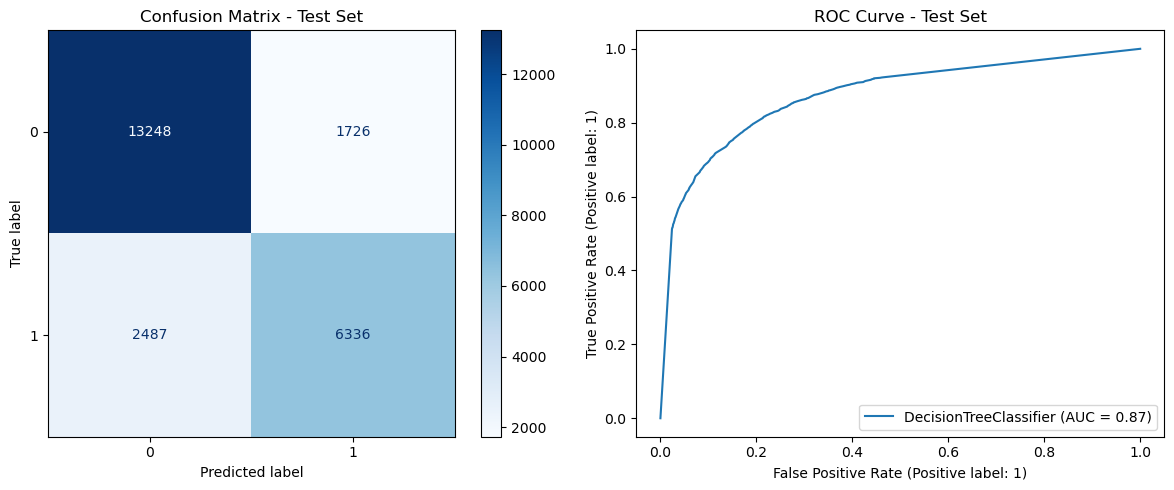

In [139]:
evaluating_model(dt_best_model, X_train, X_test, y_train, y_test)

### Random Forest Section

In [152]:
rf_base = RandomForestClassifier(random_state = 0)

In [153]:
rf_hyperparameters = {"n_estimators": [100, 200, 300],
                      "criterion" : ["gini", "entropy"],
                      "max_depth": [4, 8, 24],
                      "min_samples_split": [3, 9, 18],
                      "min_samples_leaf": [3, 11, 21],
                      "class_weight" : [{0: 1, 1:w} for w in [1,2,3]]}

rf_best_model, rf_best_params = find_best_hyperparameters(rf_base, rf_hyperparameters, X_train, y_train)

print("Best Hyperparameters for Random Forest: ", rf_best_params)

Best Hyperparameters for Random Forest:  {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 24, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 300}


In [154]:
rf_results = calculating_metrics(rf_best_model, X_test, y_test, "Random Forest")

rf_results

,Random Forest
Accuracy,85.48
Recall,79.11
Precision,81.24
F1 Score,80.16
ROC AUC Score,84.17



Classification Report - Training Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     59897
           1       0.88      0.91      0.89     35291

    accuracy                           0.92     95188
   macro avg       0.91      0.92      0.91     95188
weighted avg       0.92      0.92      0.92     95188


Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     14974
           1       0.81      0.79      0.80      8823

    accuracy                           0.85     23797
   macro avg       0.85      0.84      0.84     23797
weighted avg       0.85      0.85      0.85     23797



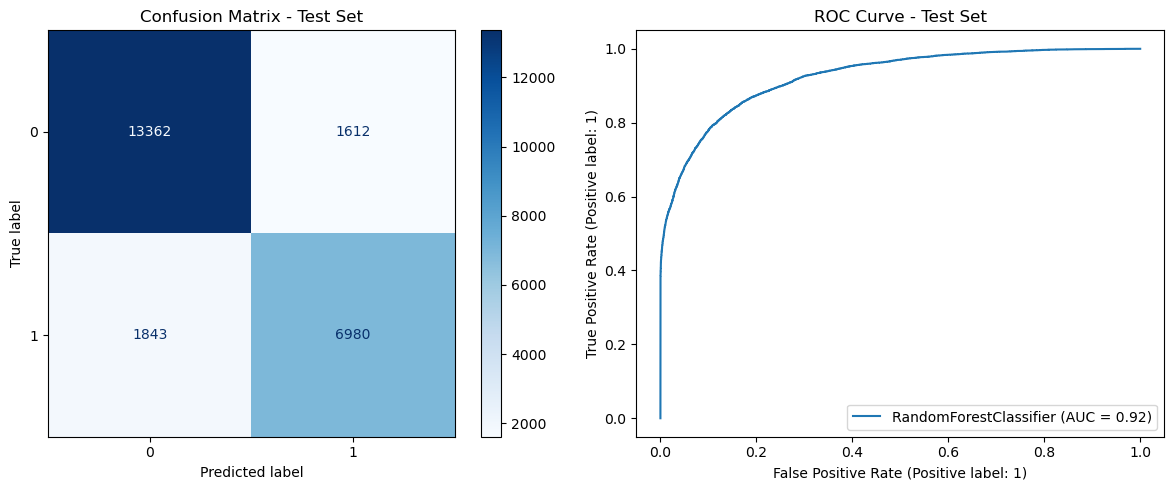

In [155]:
evaluating_model(rf_best_model, X_train, X_test, y_train, y_test)

### XGBoost Section


In [142]:
xgb_base = xgb.XGBClassifier(random_state = 0)

In [143]:
xgb_hyperparameters = {"n_estimators": [100, 200, 300],
                       "learning_rate": [0.01, 0.1, 0.3],
                       "max_depth": [3, 5, 7],
                       "subsample": [0.5, 0.7, 1],
                       "colsample_bytree": [0.5, 0.7, 1],
                       "scale_pos_weight": [1, (y_train == 0).sum() / (y_train == 1).sum()]}

In [145]:
xgb_best_model, xgb_best_params = find_best_hyperparameters(xgb_base, xgb_hyperparameters, X_train, y_train)

print("Best Hyperparameters for XGBoost: ", xgb_best_params)

Best Hyperparameters for XGBoost:  {'colsample_bytree': 1, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'scale_pos_weight': 1.697231588790343, 'subsample': 1}


In [146]:
xgb_results = calculating_metrics(xgb_best_model, X_test, y_test, "XGBoost")

xgb_results

,XGBoost
Accuracy,84.43
Recall,79.43
Precision,78.76
F1 Score,79.09
ROC AUC Score,83.40



Classification Report - Training Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     59897
           1       0.88      0.92      0.90     35291

    accuracy                           0.92     95188
   macro avg       0.92      0.92      0.92     95188
weighted avg       0.92      0.92      0.92     95188


Classification Report - Test Set
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     14974
           1       0.79      0.79      0.79      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.83      0.83     23797
weighted avg       0.84      0.84      0.84     23797



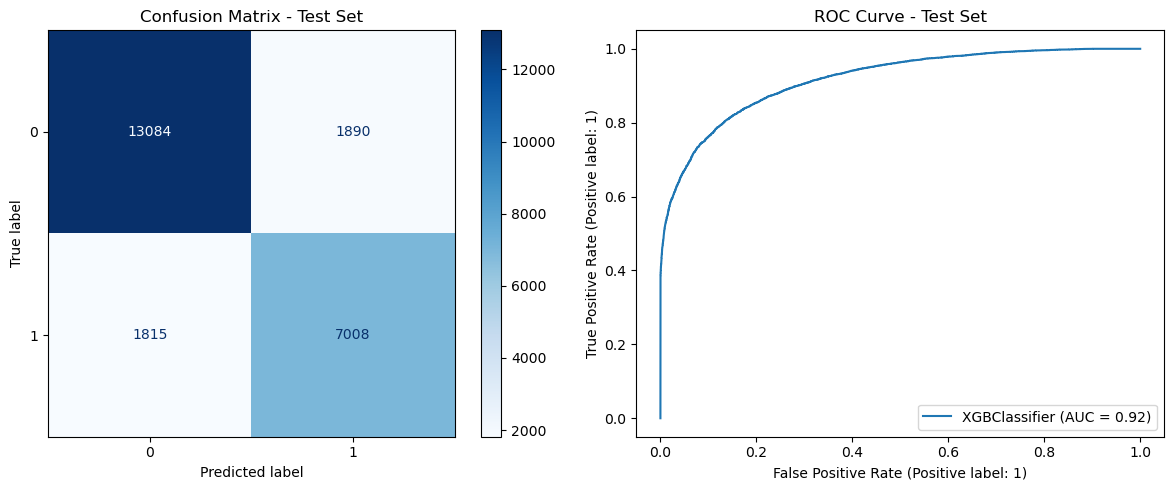

In [147]:
evaluating_model(xgb_best_model, X_train, X_test, y_train, y_test)

### Combining Results

In [157]:
concat_results = pd.concat([dt_results, rf_results, xgb_results], axis=1).T

concat_results.sort_values(by = "F1 Score", ascending = False, inplace = True)

concat_results

,Accuracy,Recall,Precision,F1 Score,ROC AUC Score
Random Forest,85.48,79.11,81.24,80.16,84.17
XGBoost,84.43,79.43,78.76,79.09,83.40
Decision Tree,82.30,71.81,78.59,75.05,80.14


### XGBoost Feature Importance

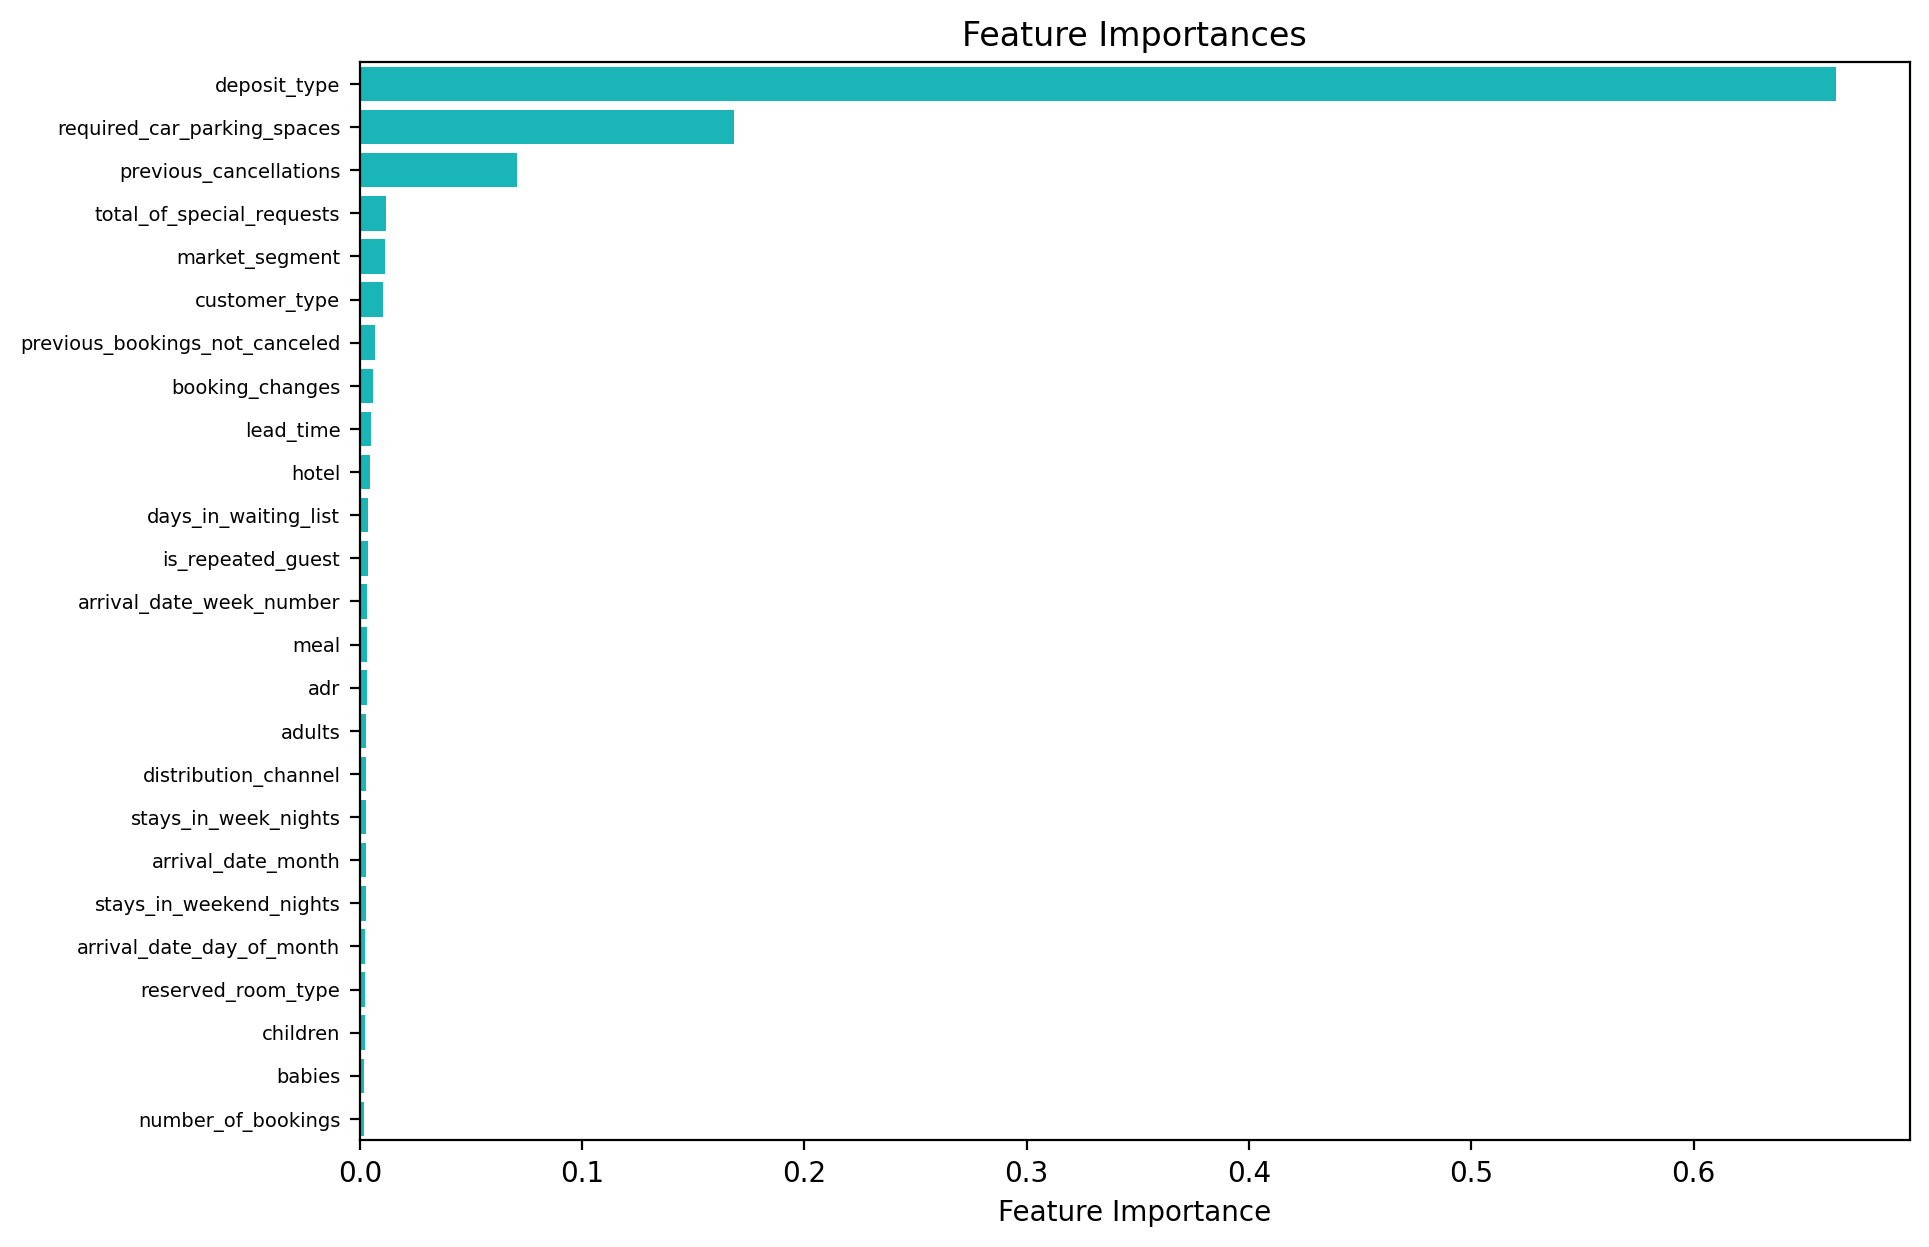

In [149]:
# Get and sort feature importances
sorted_indices = np.argsort(xgb_best_model.feature_importances_)[::-1]

# Plot
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=xgb_best_model.feature_importances_[sorted_indices], y=x.columns[sorted_indices], color='darkturquoise')

plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

### Front-End Building

In [158]:
# Pickle is a Python module used for serializing (pickling) and deserializing (unpickling) Python objects.

# Serialization is the process of converting an object into a stream of bytes to store the object a file.

# Deserialization is the process of converting a stream of bytes back into a Python object.

# Byte streams are a way of encoding and transferring information in a binary format rather than a text format. 

# Pickling a trained model allows us to save the model to a file and load it later to make predictions without having to retrain it.

import pickle

# Serializing the decision tree model
with open('rf_best_model.pkl', 'wb') as file: # WB stands for write binary (opening a file to write its content in binary format)
    pickle.dump(rf_best_model, file)
    




# If want to convert current file from notebook to python file:
# Type the following in terminal: jupyter nbconvert --to script hotel_prediction.ipynb